In [4]:
import numpy as np                  # Manejo de arreglos (álgebra lineal en Python)
import pandas as pd                 # Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt     # Gráficas
import seaborn as sns               # Gráficas estadísticas (histogramas)

In [5]:
url1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSp7Nl79TLju3_CNyVjUt0o7GhMObDNYVXAXFnzdLfwbUyoGjMIeAlL50uWL8I_mCluO4CRkz4JCH4E/pub?output=csv'#url del archivo CSV publicado en google

datos = pd.read_csv (url1) #Carga el archivo csv como DataFrame (arreglo de datos con filas y columnas)

datos.head()               #Muestra las primeras 5 filas del dataframe

datos.tail()               #Muestra las ultimas 5 filas del dataframe

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
17732,17732,1571,17146,Araya Dennis,53,42,57,49,52,25,...,England,Barclays WSL,Spurs,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17733,17733,1572,17146,Alexia Férnandez,53,53,55,51,53,34,...,Spain,Liga F,Granada CF,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17734,17734,1573,17146,Aleigh Gambone,53,60,58,53,56,49,...,United States,Scottish Women's League,Glasgow City FC,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17735,17735,1574,17146,Joy Lysser,53,61,52,48,56,53,...,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17736,17736,1575,17146,Kateřina Vithová,53,60,49,53,54,27,...,Czech Republic,Ceska Liga Žen,Slavia Praha,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [6]:
# Muestra un resumen conciso del DataFrame, que incluye:
#El número de entradas (filas) y columnas
#El tipo de datos de cada columna (ej. int, float, object)
#Cuántos valores no nulos hay en cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           17737 non-null  int64  
 1   Unnamed: 0             17737 non-null  int64  
 2   Rank                   17737 non-null  int64  
 3   Name                   17737 non-null  object 
 4   OVR                    17737 non-null  int64  
 5   PAC                    17737 non-null  int64  
 6   SHO                    17737 non-null  int64  
 7   PAS                    17737 non-null  int64  
 8   DRI                    17737 non-null  int64  
 9   DEF                    17737 non-null  int64  
 10  PHY                    17737 non-null  int64  
 11  Acceleration           17737 non-null  int64  
 12  Sprint Speed           17737 non-null  int64  
 13  Positioning            17737 non-null  int64  
 14  Finishing              17737 non-null  int64  
 15  Sh

In [7]:
#eliminar la columna indice

datos.drop('Unnamed: 0',axis=1 ,inplace= True) # Nombre de la columna, axis = columna o fila, inplace = True (elimina la columna) False (Eliminacion hipotetica)

In [8]:
datos.shape #cantidad de datos y columnas

(17737, 57)

In [9]:
#Crearemos un histograma
x = datos["OVR"]               #Variable que almacena los datos de la columna OVR (calificación general)"
bins_ = np.arange(40,100,1)    #Crea el histograma

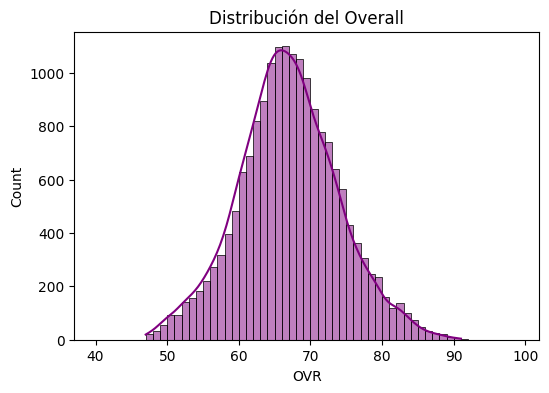

In [10]:
plt.figure(figsize=(6,4))#crea una figura de tamaño de 6x4 pulgadas

# Genera un histograma usando seaborn (sns) basado en la columna "OVR" de los datos.
# Se utiliza la variable "bins_" para definir el número de bins (intervalos) del histograma.
# El color de las barras es "salmon" y 'kde=True' añade una curva de densidad suavizada sobre el histograma.
sns.histplot(x = "OVR", data = datos, bins = bins_, color = "purple", kde=True )
plt.title('Distribución del Overall')#establece el titulo
plt.show()#muesta el grafico en pantalla

In [11]:
# Agrupa los datos por la columna 'Position', luego calcula la mediana de los valores en la columna 'OVR' para cada grupo.
# La mediana es una medida de tendencia central que representa el valor medio de los datos.
posiciones = datos.groupby('Position')['OVR'].median().sort_values().index
posiciones#muestra las posiciones

Index(['GK', 'CM', 'LB', 'RB', 'CAM', 'CB', 'CDM', 'LM', 'LW', 'RM', 'RW',
       'ST'],
      dtype='object', name='Position')

<ipython-input-12-3796a231b25a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="Position",


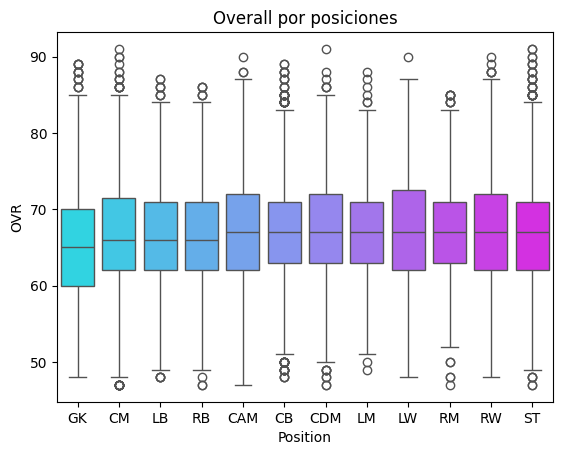

In [12]:
##Diagrama de cajs (Boxplt)
# Crea un gráfico de cajas usando seaborn (sns), donde:
# - El eje X contiene las diferentes posiciones (Position).
# - El eje Y contiene los valores del Overall (OVR).
# - Los datos provienen del DataFrame 'datos'.
# - La variable 'order' organiza las posiciones de acuerdo con las medianas calculadas previamente ('posiciones').
# - 'palette' define el esquema de colores utilizado para las cajas, en este caso 'Accent'.
sns.boxplot(x ="Position",
            y = "OVR",
            data =datos,
            order = posiciones,
            palette= 'cool')
plt.title("Overall por posiciones")#establece el título del gráfico
plt.show()#muestra el gráfico en pantalla

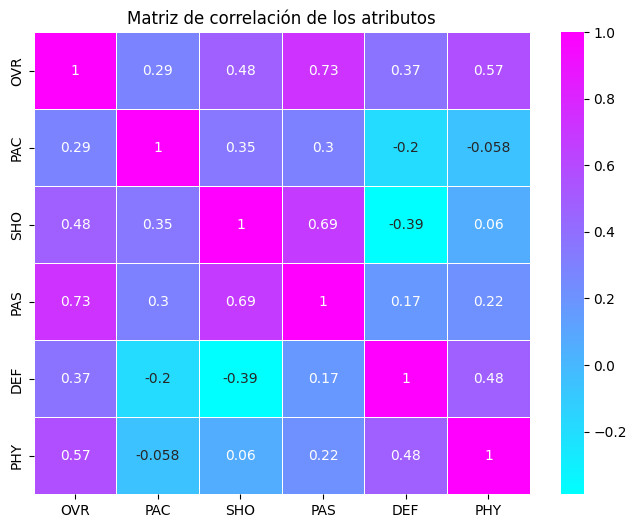

In [13]:
### Atribucion de la matriz de correlación
corr_matrix = datos[['OVR','PAC','SHO','PAS','DEF','PHY',]].corr() # SE LLAMAN LAS COLUMANS QUE SE QUIEREN CORRELACIONAR
mask = np.triu(np.ones_like(corr_matrix,dtype=bool)) #matriz triangular
##grafica
plt.figure(figsize=(8,6))#crea una figura de 8x6 pulgadas
sns.heatmap(corr_matrix, annot = True, cmap='cool', linewidths =0.5)#, mask =mask)para que me lo muestre en forma escalonada
plt.title('Matriz de correlación de los atributos')#establece el titulo
plt.show()#muestra la imagen en pantalla

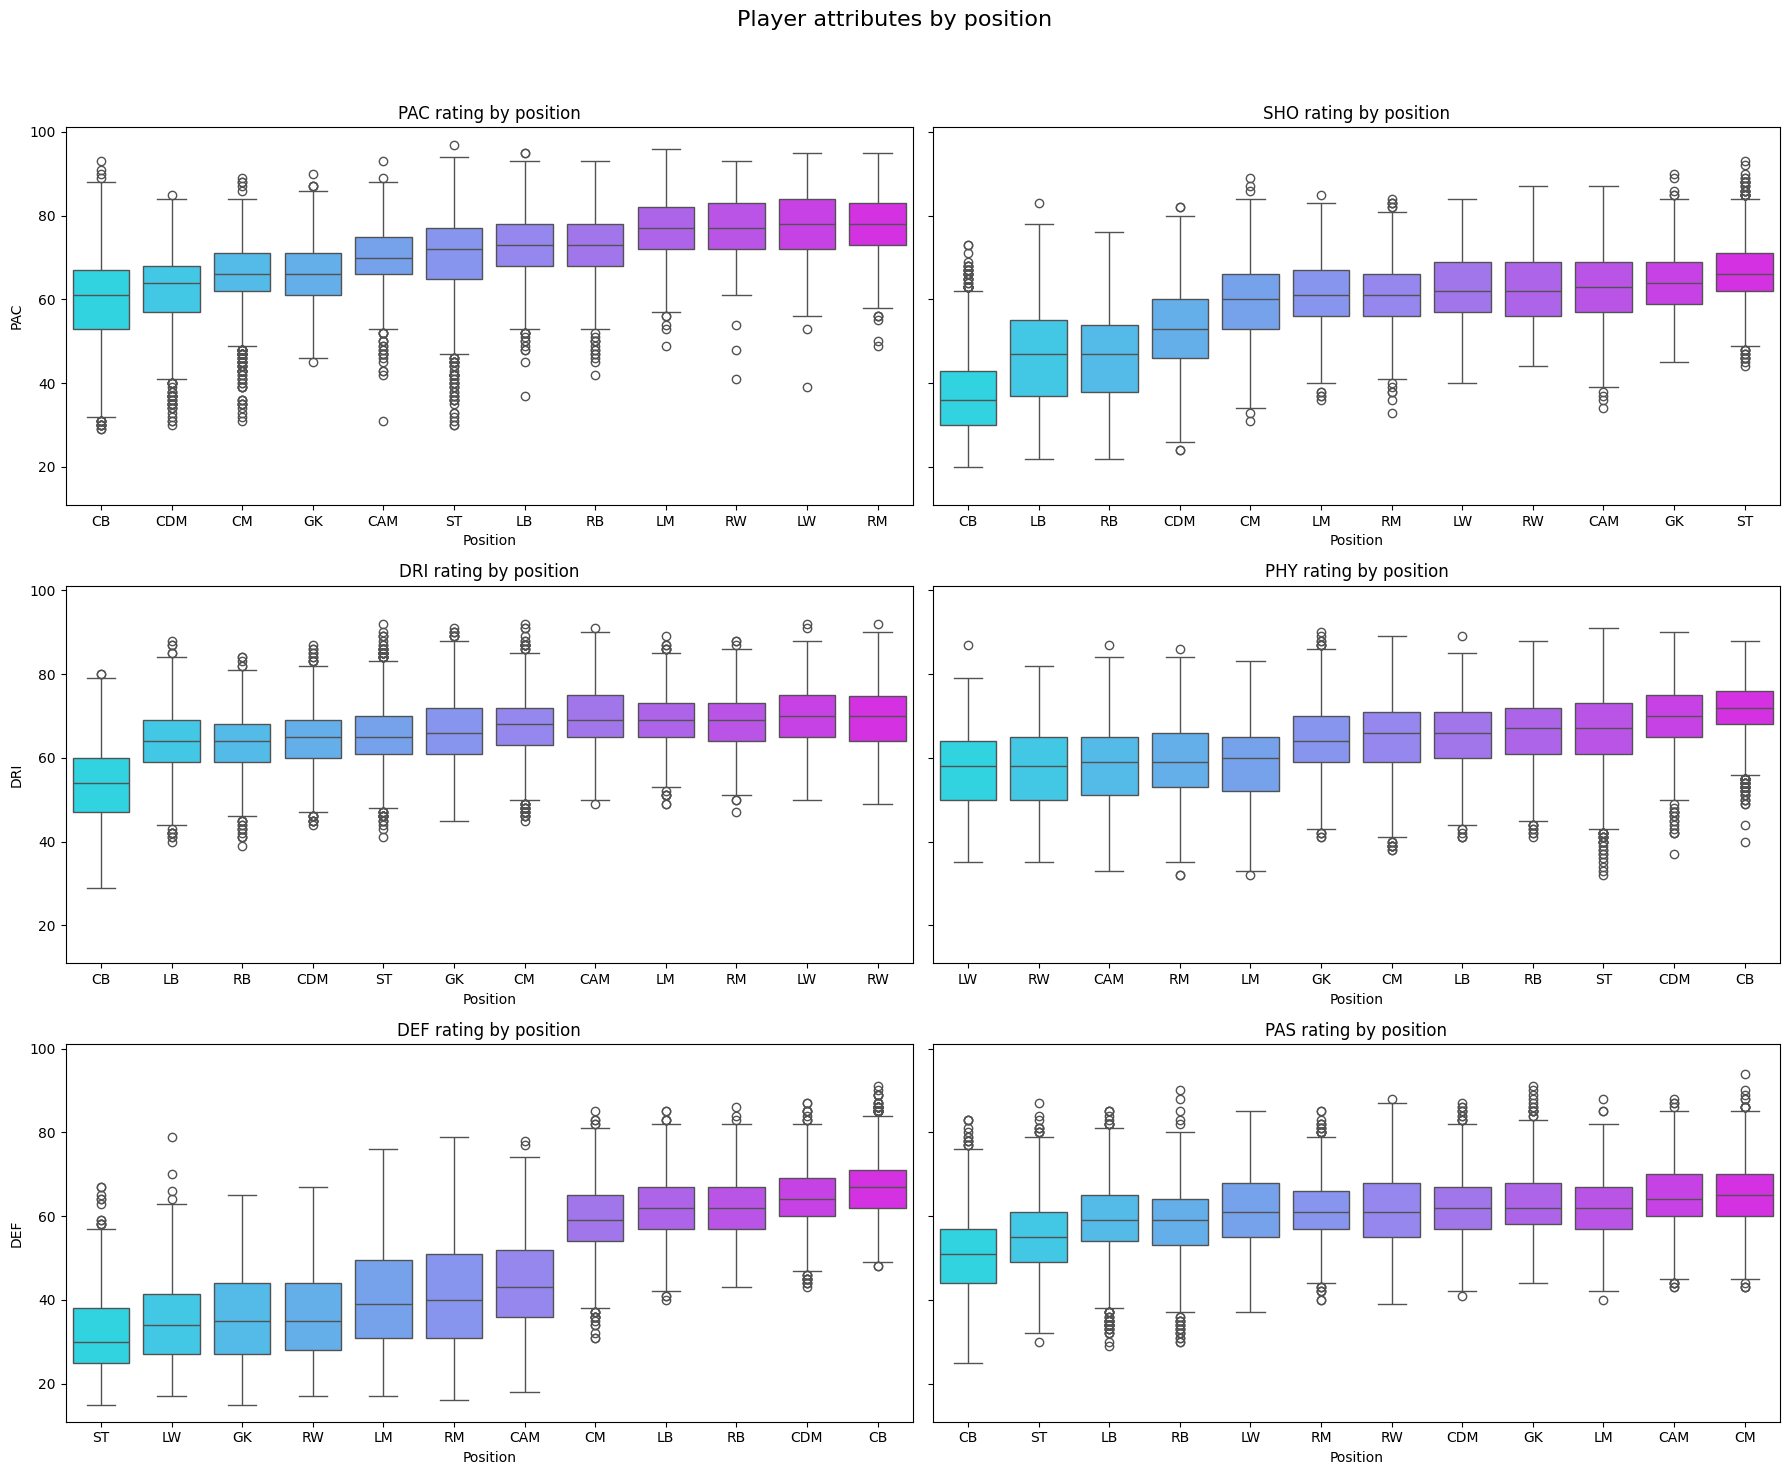

In [14]:
import warnings# Importa el módulo de advertencias para gestionar mensajes de advertencia
warnings.filterwarnings('ignore')# Ignora las advertencias para evitar que aparezcan en la salida
attributes = ['PAC', 'SHO', 'DRI', 'PHY', 'DEF', 'PAS']# Lista de atributos a visualizar
#Configura la figura y los ejes para los subgráficos, con 3 filas y 2 columnas
#'figsize' establece el tamaño de la figura en pulgadas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15), sharey=True,)
fig.suptitle('Player attributes by position', fontsize=16)# Establece el título general de la figura
axes = axes.flatten()# Aplana la matriz de ejes para facilitar la iteración en el bucle
for i, attr in enumerate(attributes):
    order = datos.groupby('Position')[attr].median().sort_values().index# Agrupa los datos por 'Position' y calcula la mediana de cada atributo, luego ordena las posiciones
    sns.boxplot(x='Position', y=attr, data=datos, ax=axes[i], order=order, palette = 'cool')#Dibuja el boxplot para cada atributo con las categorías ordenadas
    axes[i].set_title(f'{attr} rating by position')# Establece el título de cada subgráfico según el atributo
    axes[i].set_ylabel(f'{attr}')# Establece la etiqueta del eje Y para el atributo correspondiente
    axes[i].set_xlabel('Position')# Establece la etiqueta del eje X como 'Position'

plt.tight_layout(rect=[0, 0, 1, 0.95])# Ajusta el diseño para prevenir superposiciones entre subgráficos
plt.show()#muestra el gráfico en pantalla